<a href="https://colab.research.google.com/github/DataDrivenAkanksha/Silicon_wafer_map_image_classification/blob/main/Silicon_wafer_map_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This dataset contains a subset of the WM811k Silicon Wafer Map Dataset originally taken from http://mirlab.org/dataSet/public/, designed for defect classification in semiconductor manufacturing. The dataset is organized into nine defect categories and is complemented by a MATLAB implementation of a Convolutional Neural Network (CNN) for defect recognition.

It supports research on identifying and classifying manufacturing defects in silicon wafers. The dataset is part of the research presented in the paper:
Enhancing Defect Recognition: Convolutional Neural Networks for Silicon Wafer Map Analysis

📄 Read the Paper on IEEE Xplore DOI: 10.1109/ICAEEE62219.2024.10561853

Key Features
Defect Categories: Center, Donut, Edge Local, Edge Ring, Local, Near Full, None, Random, Scratch.

Image Format: 32x32 pixels .png images.

Total Images: 902 (sampled subset of WM811k)

In [1]:
# connecting to the kaggle by using API token
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
# Loading the data data from kaggle
!kaggle datasets download -d muhammedjunayed/wm811k-silicon-wafer-map-dataset-image

Dataset URL: https://www.kaggle.com/datasets/muhammedjunayed/wm811k-silicon-wafer-map-dataset-image
License(s): CC-BY-SA-4.0
  0% 0.00/983k [00:00<?, ?B/s]
100% 983k/983k [00:00<00:00, 109MB/s]


In [3]:
# unzipping the data
!unzip wm811k-silicon-wafer-map-dataset-image.zip

Archive:  wm811k-silicon-wafer-map-dataset-image.zip
  inflating: WM811k_Dataset/Center/641447.jpg  
  inflating: WM811k_Dataset/Center/642989.jpg  
  inflating: WM811k_Dataset/Center/646177.jpg  
  inflating: WM811k_Dataset/Center/648236.jpg  
  inflating: WM811k_Dataset/Center/651816.jpg  
  inflating: WM811k_Dataset/Center/655870.jpg  
  inflating: WM811k_Dataset/Center/659673.jpg  
  inflating: WM811k_Dataset/Center/678673.jpg  
  inflating: WM811k_Dataset/Center/679609.jpg  
  inflating: WM811k_Dataset/Center/680688.jpg  
  inflating: WM811k_Dataset/Center/682743.jpg  
  inflating: WM811k_Dataset/Center/683806.jpg  
  inflating: WM811k_Dataset/Center/686597.jpg  
  inflating: WM811k_Dataset/Center/687416.jpg  
  inflating: WM811k_Dataset/Center/691371.jpg  
  inflating: WM811k_Dataset/Center/692645.jpg  
  inflating: WM811k_Dataset/Center/696055.jpg  
  inflating: WM811k_Dataset/Center/712477.jpg  
  inflating: WM811k_Dataset/Center/713551.jpg  
  inflating: WM811k_Dataset/Center/

Data Preprocessing

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


Splitting the data into train validation and test sets

In [5]:
pip install split-folders

In [6]:
import splitfolders

input_folder = "WM811k_Dataset" #path to the original folder
output_folder = "output_dataset" #output folder where train, val, test will be saved
splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.7, .2, .1))

Copying files: 902 files [00:00, 2459.01 files/s]


Displaying few images from each class of training dataset

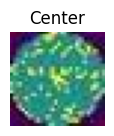

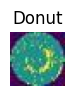

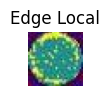

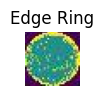

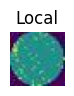

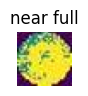

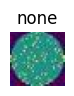

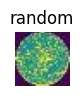

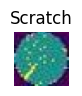

In [7]:
class_names = ['Center', 'Donut', 'Edge Local', 'Edge Ring', 'Local', 'near full', 'none', 'random', 'Scratch']
num_classes=len(class_names)

sample_per_class = 1
plt.figure(figsize=(10,5))
for class_idx, class_name in enumerate(class_names):
  folder_path = f"{output_folder}/train/{class_name}"
  image_files = os.listdir(folder_path)
  num_images = len(image_files)
  if num_images >= sample_per_class:
    selected_images = np.random.choice(image_files, sample_per_class, replace=False)
    for i, image_file in enumerate(selected_images):
      image_path = os.path.join(folder_path, image_file)
      image = plt.imread(image_path)
      plt.subplot(sample_per_class, num_classes, class_idx * sample_per_class + i + 1)
      plt.imshow(image)
      plt.axis('off')
      plt.title(class_name)
      plt.tight_layout()
  plt.show()



Exploratory Data Analysis (EDA)

In [8]:
# checking the train val and test data distribution using bar chart


import numpy as np
import matplotlib.pyplot as plt

def get_dataset_info(dataset, class_names=None):
    # Infer number of classes
    num_classes = len(class_names) if class_names else 10
    class_counts = {i: 0 for i in range(num_classes)}
    total_samples = 0

    for images, labels in dataset:
        labels = labels.numpy()  # Convert to NumPy array

        # Convert one-hot encoded labels to class indices
        class_indices = np.argmax(labels, axis=1)

        total_samples += len(class_indices)

        for class_index in class_indices:
            class_counts[int(class_index)] += 1

    # Print dataset info
    print(f"Total samples: {total_samples}")
    for label, count in class_counts.items():
        name = class_names[label] if class_names else f"Class {label}"
        print(f"{name}: {count} samples")

    # Plot class distribution
    label_names = [class_names[i] if class_names else f"Class {i}" for i in range(num_classes)]
    counts = [class_counts[i] for i in range(num_classes)]

    plt.figure(figsize=(10, 5))
    plt.bar(label_names, counts, color='skyblue')
    plt.title("Class Distribution")
    plt.xlabel("Classes")
    plt.ylabel("Number of Samples")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()




Found 630 files belonging to 9 classes.
Found 179 files belonging to 9 classes.
Found 93 files belonging to 9 classes.
Class Names: ['Center', 'Donut', 'Edge Local', 'Edge Ring', 'Local', 'near full', 'none', 'random', 'Scratch']

Training Dataset:
Total samples: 630
Center: 70 samples
Donut: 71 samples
Edge Local: 72 samples
Edge Ring: 71 samples
Local: 70 samples
near full: 70 samples
none: 66 samples
random: 70 samples
Scratch: 70 samples


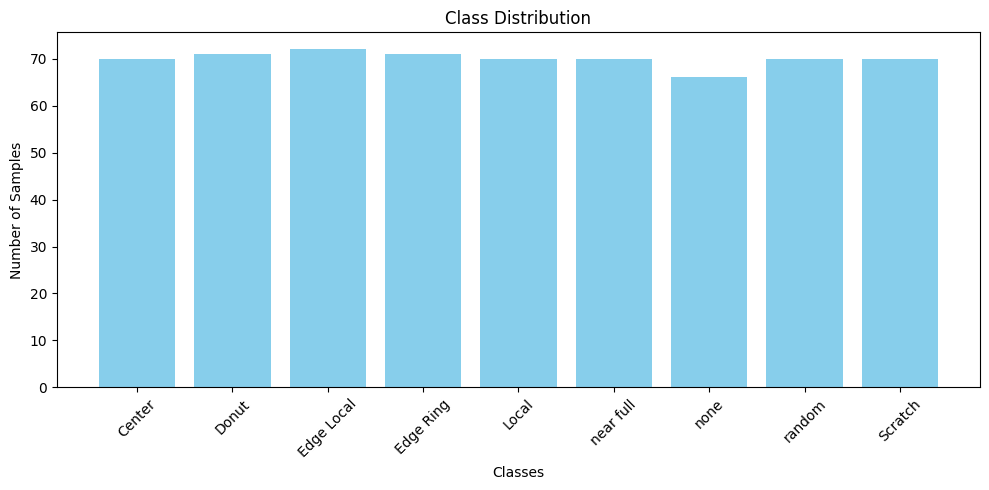


Validation Dataset:
Total samples: 179
Center: 20 samples
Donut: 20 samples
Edge Local: 20 samples
Edge Ring: 20 samples
Local: 20 samples
near full: 20 samples
none: 19 samples
random: 20 samples
Scratch: 20 samples


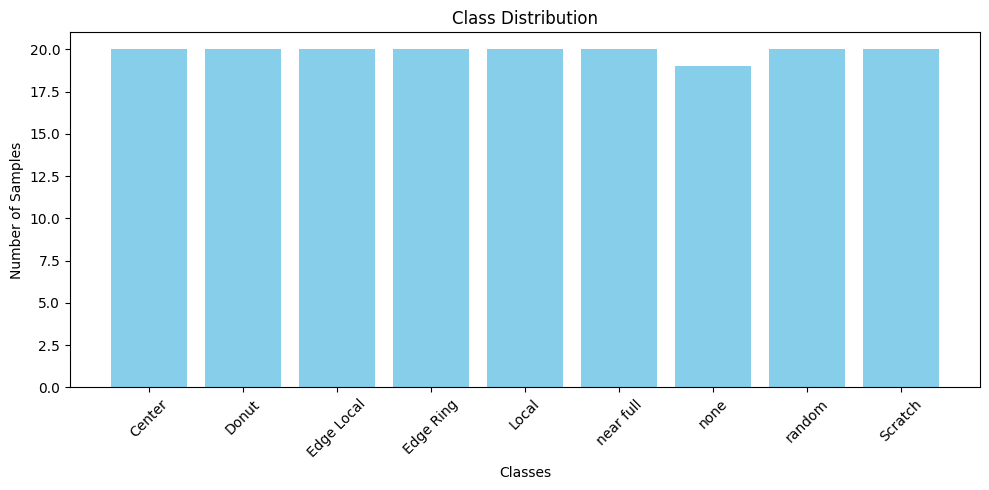


Testing Dataset:
Total samples: 93
Center: 10 samples
Donut: 11 samples
Edge Local: 11 samples
Edge Ring: 11 samples
Local: 10 samples
near full: 10 samples
none: 10 samples
random: 10 samples
Scratch: 10 samples


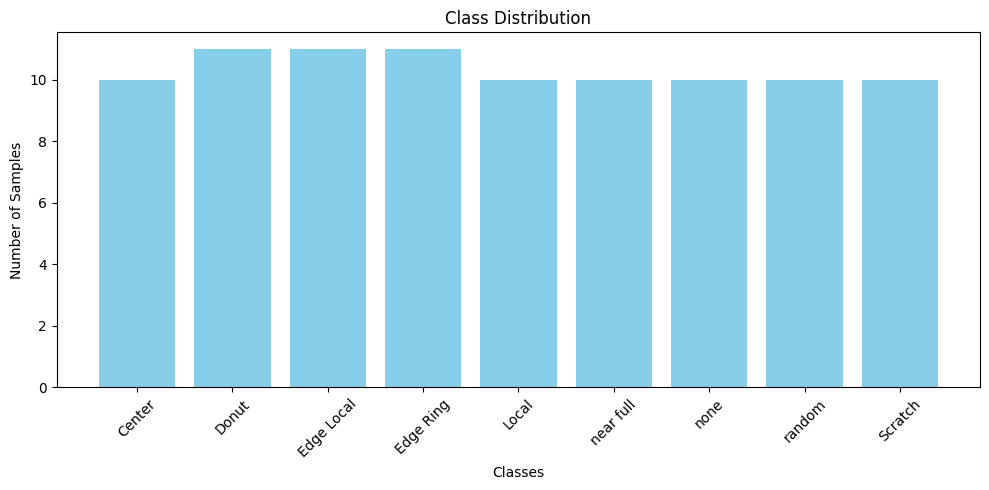

In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load datasets
train_ds = tf.keras.utils.image_dataset_from_directory(
    "output_dataset/train",
    image_size=(224, 224),
    batch_size=32,
    label_mode = 'categorical',
    shuffle=True,
    seed=42
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    "output_dataset/val",
    image_size=(224, 224),
    batch_size=32,
    label_mode = 'categorical',
    shuffle=True,
    seed=42
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    "output_dataset/test",
    image_size=(224, 224),
    batch_size=32,
    label_mode = 'categorical',
    shuffle=True,
    seed=42
)

# Extract class names
#class_names = train_ds.class_names
print("Class Names:", class_names)

# Run the info function
print("\nTraining Dataset:")
get_dataset_info(train_ds, class_names)

print("\nValidation Dataset:")
get_dataset_info(val_ds, class_names)

print("\nTesting Dataset:")
get_dataset_info(test_ds, class_names)


In [10]:
for images, labels in train_ds.take(1):
    print("Label shape:", labels.shape)
    print("Example label:", labels[0].numpy())

Label shape: (32, 9)
Example label: [0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [11]:
for images, labels in val_ds.take(1):
    print("Label shape:", labels.shape)
    print("Example label:", labels[0].numpy())

Label shape: (32, 9)
Example label: [0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [12]:
for images, labels in test_ds.take(1):
    print("Label shape:", labels.shape)
    print("Example label:", labels[0].numpy())

Label shape: (32, 9)
Example label: [0. 0. 0. 0. 0. 0. 0. 0. 1.]


Data Preprocessing

In [13]:
# Normalize pizel values
def preprocess_image(image, label):
    image = tf.cast(image/255. ,tf.float32)
    return image, label

train_ds = train_ds.map(preprocess_image)
test_ds = test_ds.map(preprocess_image)
val_ds = val_ds.map(preprocess_image)

CNN Model building

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

In [15]:
# Deep CNN model
# Deep CNN (Few layers >3 conv layers)

Deep_CNN=Sequential()
Deep_CNN.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(224,224,3)))
Deep_CNN.add(BatchNormalization())
Deep_CNN.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

Deep_CNN.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
Deep_CNN.add(BatchNormalization())
Deep_CNN.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

Deep_CNN.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
Deep_CNN.add(BatchNormalization())
Deep_CNN.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

Deep_CNN.add(Conv2D(256,kernel_size=(3,3),padding='valid',activation='relu'))
Deep_CNN.add(BatchNormalization())
Deep_CNN.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

Deep_CNN.add(Conv2D(512,kernel_size=(3,3),padding='valid',activation='relu'))
Deep_CNN.add(BatchNormalization())
Deep_CNN.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

Deep_CNN.add(Flatten())

Deep_CNN.add(Dense(128,activation='relu'))
Deep_CNN.add(Dropout(0.2))
Deep_CNN.add(Dense(64,activation='relu'))
Deep_CNN.add(Dropout(0.2))
Deep_CNN.add(Dense(9,activation='softmax'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
Deep_CNN.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 24, 24, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 10, 10, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 10, 10, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,638,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 9)              │           585 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,219,913 (12.28 MB)

 Trainable params: 3,217,929 (12.28 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [17]:

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

Deep_CNN.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

History = Deep_CNN.fit(
    train_ds,
    epochs=50,
    validation_data=val_ds, callbacks = [early_stopping]
)




Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 29s 661ms/step - accuracy: 0.2160 - loss: 4.5030 - val_accuracy: 0.2179 - val_loss: 7.7669
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 79ms/step - accuracy: 0.4830 - loss: 1.8585 - val_accuracy: 0.1117 - val_loss: 7.8346
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - accuracy: 0.4741 - loss: 2.0422 - val_accuracy: 0.1117 - val_loss: 10.5416
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.6073 - loss: 1.3458 - val_accuracy: 0.1117 - val_loss: 10.2062
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.6276 - loss: 1.1664 - val_accuracy: 0.1117 - val_loss: 7.7594
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.6531 - loss: 1.0029 - val_accuracy: 0.1173 - val_loss: 10.9472
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.6844 - loss: 0.9987 - val_accuracy: 0.1397 - val_loss: 11.7312
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.7228 - loss: 0.9033 - val_accuracy: 0.1

In [18]:
Deep_CNN.evaluate(test_ds)

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 900ms/step - accuracy: 0.0967 - loss: 8.0454


[7.858561038970947, 0.10752688348293304]

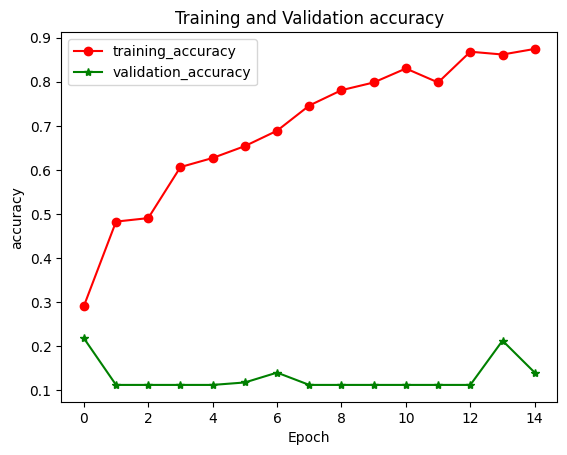

In [19]:
plt.plot(History.history['accuracy'],label='training_accuracy',marker='o',color='red')
plt.plot(History.history['val_accuracy'],label='validation_accuracy',marker='*',color='green')
plt.title('Training and Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

As we are seeing overfitting in this case which may be due to small dataset for validation compared to training so we will do data augmentation.

In [20]:
import numpy as np

def dataset_to_numpy(dataset):
    images = []
    labels = []

    for batch in dataset:
        batch_images, batch_labels = batch
        images.append(batch_images.numpy())
        labels.append(batch_labels.numpy())

    X = np.concatenate(images)
    y = np.concatenate(labels)
    return X, y

In [21]:
X_train, y_train = dataset_to_numpy(train_ds)
X_val, y_val   = dataset_to_numpy(val_ds)
X_test, y_test   = dataset_to_numpy(test_ds)

In [22]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def evaluate_classification_model(name, model, X_train, y_train, X_test, y_test):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Convert one-hot encoded labels to class indices
    if y_train.ndim > 1:
        y_train = np.argmax(y_train, axis=1)
        y_test = np.argmax(y_test, axis=1)

    # Convert prediction probabilities to class indices
    if y_pred_train.ndim > 1:
        y_pred_train = np.argmax(y_pred_train, axis=1)
        y_pred_test = np.argmax(y_pred_test, axis=1)
    acc_train = accuracy_score(y_train, y_pred_train) * 100
    acc_test = accuracy_score(y_test, y_pred_test) * 100
    overfitting_score = (acc_train - acc_test)/acc_train * 100
    is_overfitting = 'Y' if overfitting_score > 5 else 'N'

    return {
        'Model': name,
        'Accuracy Train (%)': acc_train,
        'Accuracy Test (%)': acc_test,
        'Precision': precision_score(y_test, y_pred_test, average='weighted'),
        'Recall': recall_score(y_test, y_pred_test, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred_test, average='weighted'),
        'Overfitting(Y/N)': is_overfitting
    }





In [23]:
models = [
    ('Deep_CNN', Deep_CNN),
    # Add more models if needed
]

results = [evaluate_classification_model(name, model, X_train, y_train, X_test, y_test) for name, model in models]
results_df = pd.DataFrame(results).round(3)
print(results_df.to_string(index=False))

20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 148ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 247ms/step
   Model  Accuracy Train (%)  Accuracy Test (%)  Precision  Recall  F1-Score Overfitting(Y/N)
Deep_CNN              11.111             10.753      0.012   0.108     0.021                N


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


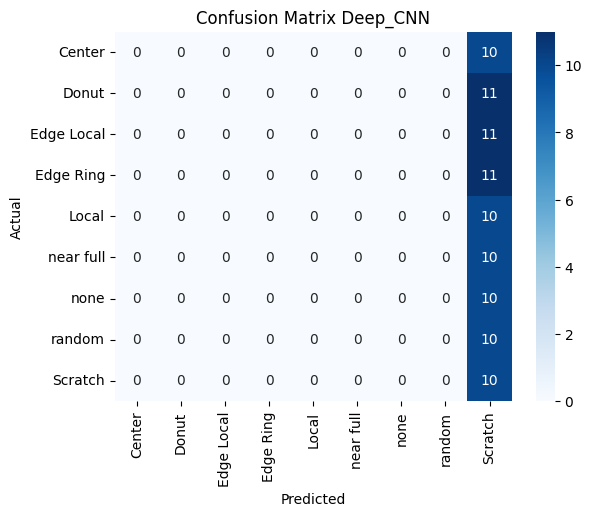

In [24]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict class probabilities
y_pred_probs = Deep_CNN.predict(X_test)

# Convert probabilities to class labels (indices)
y_pred_test = np.argmax(y_pred_probs, axis=1)

# Convert one-hot encoded y_test to class labels if needed
if y_test.ndim > 1:
    y_test_labels = np.argmax(y_test, axis=1)
else:
    y_test_labels = y_test

# Compute confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_test)

# Plot confusion matrix with seaborn heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Deep_CNN')
plt.show()

Data Augmentation on training data


In [25]:
# Data Augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
# Define the augmenter
train_datagen = ImageDataGenerator(

    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,

)

# No augmentation for validation/test
test_datagen = ImageDataGenerator()
val_datagen = ImageDataGenerator()

# Create generators from NumPy arrays
train_generator = train_datagen.flow(
    X_train, y_train,
    batch_size=32,
    shuffle=True
)

val_generator = val_datagen.flow(
    X_val, y_val,
    batch_size=32,
    shuffle=False
)

test_generator = test_datagen.flow(
    X_test, y_test,
    batch_size=32,
    shuffle=False
)

In [26]:
History1 = Deep_CNN.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator, callbacks = [early_stopping]
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 379ms/step - accuracy: 0.5735 - loss: 1.4979 - val_accuracy: 0.2179 - val_loss: 10.4850
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 347ms/step - accuracy: 0.5916 - loss: 1.3947 - val_accuracy: 0.1117 - val_loss: 7.7218
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 395ms/step - accuracy: 0.5579 - loss: 1.4147 - val_accuracy: 0.1676 - val_loss: 9.1196
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 352ms/step - accuracy: 0.5787 - loss: 1.3418 - val_accuracy: 0.2123 - val_loss: 6.0546
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 389ms/step - accuracy: 0.6341 - loss: 1.2632 - val_accuracy: 0.2123 - val_loss: 6.5443
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 395ms/step - accuracy: 0.6374 - loss: 1.1506 - val_accuracy: 0.2458 - val_loss: 3.7300
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 345ms/step - accuracy: 0.6452 - loss: 0.9604 - val_accuracy: 0.2291 - val_loss: 4.8638
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 398ms/step - accuracy: 0.7558 - loss: 0.7671 - val_accuracy: 0

In [27]:
Deep_CNN.evaluate(test_generator)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7846 - loss: 0.8290


[0.9090846180915833, 0.7956989407539368]

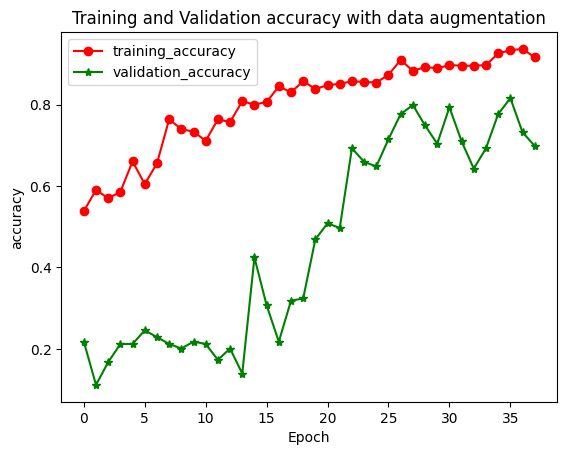

In [28]:
plt.plot(History1.history['accuracy'],label='training_accuracy',marker='o',color='red')
plt.plot(History1.history['val_accuracy'],label='validation_accuracy',marker='*',color='green')
plt.title('Training and Validation accuracy with data augmentation')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [29]:
models = [
    ('Deep_CNN + data_aug', Deep_CNN),
    # Add more models if needed
]

results = [evaluate_classification_model(name, model, X_train, y_train, X_test, y_test) for name, model in models]
results_df = pd.DataFrame(results).round(3)
print(results_df.to_string(index=False))

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
              Model  Accuracy Train (%)  Accuracy Test (%)  Precision  Recall  F1-Score Overfitting(Y/N)
Deep_CNN + data_aug              95.714              79.57      0.801   0.796     0.796                Y


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


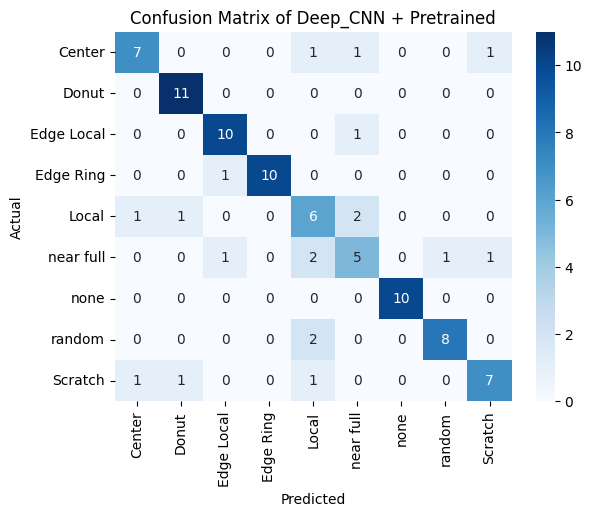

In [30]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict class probabilities
y_pred_probs = Deep_CNN.predict(X_test)

# Convert probabilities to class labels (indices)
y_pred_test = np.argmax(y_pred_probs, axis=1)

# Convert one-hot encoded y_test to class labels if needed
if y_test.ndim > 1:
    y_test_labels = np.argmax(y_test, axis=1)
else:
    y_test_labels = y_test

# Compute confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_test)

# Plot confusion matrix with seaborn heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Deep_CNN + Pretrained')
plt.show()

In [49]:
Deep_CNN.save('Deep_CNN.h5')

Using pretrained model Vgg16

In [31]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))
conv_base.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model_vgg16_pretrained = Sequential()
model_vgg16_pretrained.add(conv_base)
model_vgg16_pretrained.add(Flatten())
model_vgg16_pretrained.add(Dense(128, activation='relu'))
model_vgg16_pretrained.add(Dropout(0.2))
model_vgg16_pretrained.add(Dense(64,activation='relu'))
model_vgg16_pretrained.add(Dropout(0.2))
model_vgg16_pretrained.add(Dense(9,activation='softmax'))

In [33]:
conv_base.trainable = False
model_vgg16_pretrained.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 9)              │           585 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,934,921 (68.42 MB)

 Trainable params: 3,220,233 (12.28 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [34]:
model_vgg16_pretrained.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [35]:
History2=model_vgg16_pretrained.fit(train_ds,epochs=50,validation_data=val_ds, callbacks=[early_stopping])

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.1727 - loss: 2.5282 - val_accuracy: 0.5475 - val_loss: 1.6310
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 215ms/step - accuracy: 0.4128 - loss: 1.6396 - val_accuracy: 0.6034 - val_loss: 1.3038
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 216ms/step - accuracy: 0.5053 - loss: 1.3357 - val_accuracy: 0.6145 - val_loss: 1.1392
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 217ms/step - accuracy: 0.5614 - loss: 1.1631 - val_accuracy: 0.7039 - val_loss: 0.9878
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 214ms/step - accuracy: 0.6114 - loss: 1.0320 - val_accuracy: 0.7039 - val_loss: 0.9685
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 216ms/step - accuracy: 0.6494 - loss: 0.9776 - val_accuracy: 0.6760 - val_loss: 0.9398
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 216ms/step - accuracy: 0.6632 - loss: 0.9232 - val_accuracy: 0.7374 - val_loss: 0.8076
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 216ms/step - accuracy: 0.6890 - loss: 0.8482 - val_accuracy: 0.72

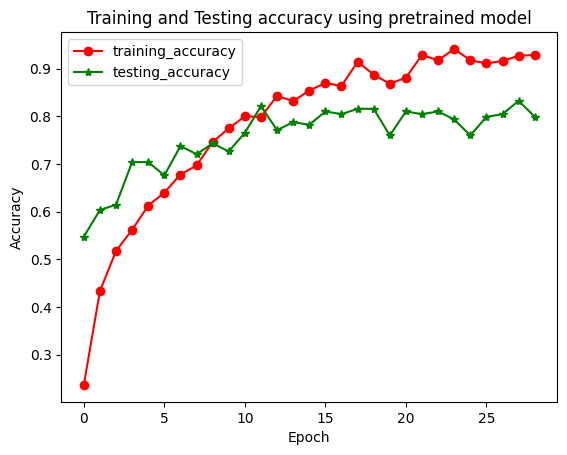

In [36]:

plt.plot(History2.history['accuracy'],label='training_accuracy',marker='o',color='red')
plt.plot(History2.history['val_accuracy'],label='testing_accuracy',marker='*',color='green')
plt.title('Training and Testing accuracy using pretrained model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [37]:
models = [
    ('VGG_pretrained', model_vgg16_pretrained),

]

results = [evaluate_classification_model(name, model, X_train, y_train, X_test, y_test) for name, model in models]
results_df = pd.DataFrame(results).round(3)
print(results_df.to_string(index=False))

20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 196ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 6s/step
         Model  Accuracy Train (%)  Accuracy Test (%)  Precision  Recall  F1-Score Overfitting(Y/N)
VGG_pretrained              98.571             76.344      0.779   0.763     0.761                Y


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 166ms/step


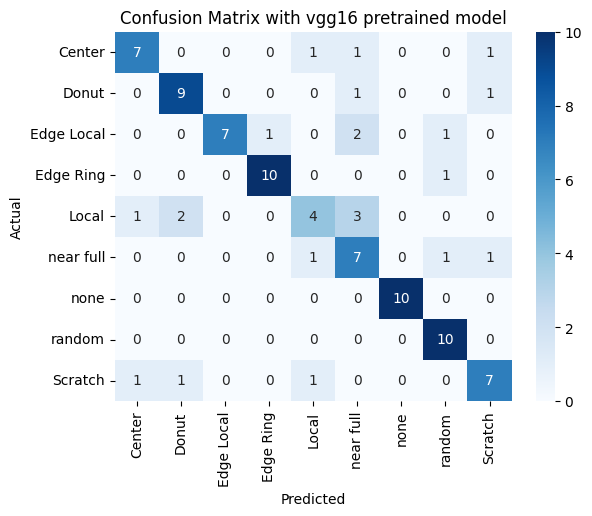

In [38]:
# Predict class probabilities
y_pred_probs = model_vgg16_pretrained.predict(X_test)

# Convert probabilities to class labels (indices)
y_pred_test = np.argmax(y_pred_probs, axis=1)

# Convert one-hot encoded y_test to class labels if needed
if y_test.ndim > 1:
    y_test_labels = np.argmax(y_test, axis=1)
else:
    y_test_labels = y_test

# Compute confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_test)

# Plot confusion matrix with seaborn heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix with vgg16 pretrained model')
plt.show()

Vgg16 pretrained model + data augmentation

In [39]:
History3 = model_vgg16_pretrained.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator, callbacks = [early_stopping]
)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 458ms/step - accuracy: 0.6681 - loss: 1.0247 - val_accuracy: 0.7486 - val_loss: 0.7788
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 453ms/step - accuracy: 0.6657 - loss: 1.0510 - val_accuracy: 0.8045 - val_loss: 0.7600
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 418ms/step - accuracy: 0.6463 - loss: 0.9677 - val_accuracy: 0.7654 - val_loss: 0.7505
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 449ms/step - accuracy: 0.6664 - loss: 0.9642 - val_accuracy: 0.6816 - val_loss: 0.9507
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 449ms/step - accuracy: 0.6877 - loss: 0.8711 - val_accuracy: 0.7598 - val_loss: 0.7149
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 428ms/step - accuracy: 0.6705 - loss: 0.8606 - val_accuracy: 0.7821 - val_loss: 0.8292
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 412ms/step - accuracy: 0.7163 - loss: 0.8083 - val_accuracy: 0.7709 - val_loss: 0.6596
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 449ms/step - accuracy: 0.7314 - loss: 0.7586 - val_accuracy: 0.

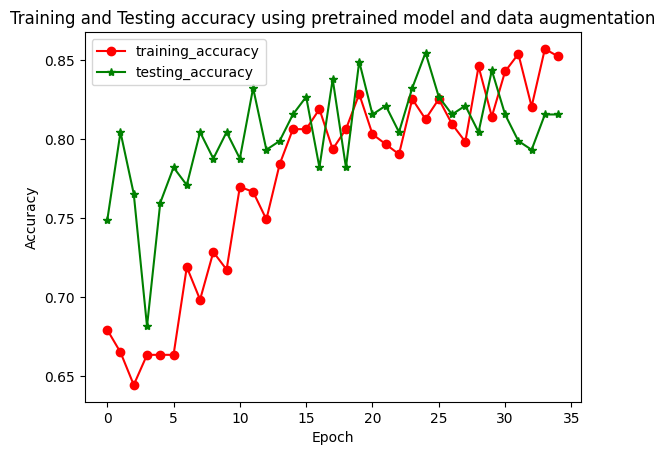

In [40]:
plt.plot(History3.history['accuracy'],label='training_accuracy',marker='o',color='red')
plt.plot(History3.history['val_accuracy'],label='testing_accuracy',marker='*',color='green')
plt.title('Training and Testing accuracy using pretrained model and data augmentation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [41]:
models = [
    ('VGG_pretrained + Data_Augmenatation', model_vgg16_pretrained),

]

results = [evaluate_classification_model(name, model, X_train, y_train, X_test, y_test) for name, model in models]
results_df = pd.DataFrame(results).round(3)
print(results_df.to_string(index=False))

20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 167ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step
                              Model  Accuracy Train (%)  Accuracy Test (%)  Precision  Recall  F1-Score Overfitting(Y/N)
VGG_pretrained + Data_Augmenatation               98.73             78.495      0.799   0.785     0.786                Y


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 167ms/step


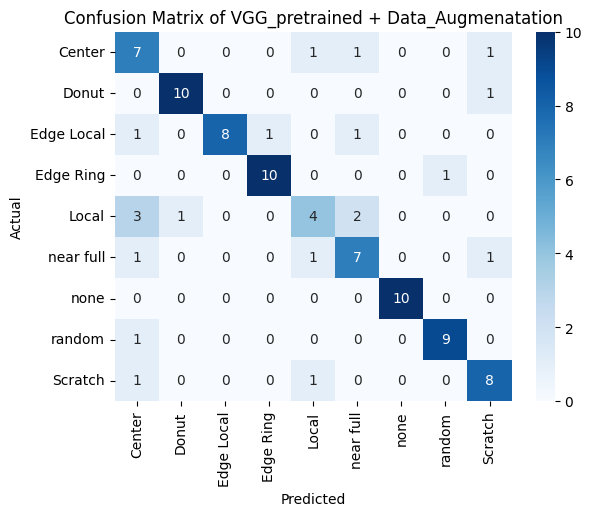

In [42]:
# Predict class probabilities
y_pred_probs = model_vgg16_pretrained.predict(X_test)

# Convert probabilities to class labels (indices)
y_pred_test = np.argmax(y_pred_probs, axis=1)

# Convert one-hot encoded y_test to class labels if needed
if y_test.ndim > 1:
    y_test_labels = np.argmax(y_test, axis=1)
else:
    y_test_labels = y_test

# Compute confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_test)

# Plot confusion matrix with seaborn heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of VGG_pretrained + Data_Augmenatation')
plt.show()

Final Summary:

| Model                                 | Accuracy Train (%) | Accuracy Test (%) | Precision | Recall | F1-Score | Overfitting (Y/N) |
|---------------------------------------|---------------------|--------------------|-----------|--------|----------|-------------------|
| Deep_CNN                              | 11.111              | 10.753             | 0.012     | 0.108  | 0.021    | N                 |
| Deep_CNN + Data Augmentation          | 95.714              | 79.570             | 0.801     | 0.796  | 0.796    | Y                 |
| VGG Pretrained                        | 98.571              | 76.344             | 0.779     | 0.763  | 0.761    | Y                 |
| VGG Pretrained + Data Augmentation    | 98.730              | 78.495             | 0.799     | 0.785  | 0.786    | Y                 |



Saving the best model

In [43]:
# saving the model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
from keras.models import Model
from keras.layers import Input, Flatten, Dense, Dropout

# Freeze the convolutional base to retain pre-trained weights
conv_base.trainable = False

# Define input
inputs = Input(shape=(224, 224, 3))

# Pass input through conv_base
x = conv_base(inputs, training=False)

# Add custom classification layers
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
outputs = Dense(9, activation='softmax')(x)

# Final model
model_vgg16_pretrained = Model(inputs, outputs)
model_vgg16_pretrained.summary()

Model: "functional_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 9)              │           585 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,934,921 (68.42 MB)

 Trainable params: 3,220,233 (12.28 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [45]:
model_vgg16_pretrained.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

In [46]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history4=model_vgg16_pretrained.fit(train_ds,epochs=50,validation_data=val_ds, callbacks=[early_stopping])

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 460ms/step - accuracy: 0.1498 - loss: 2.6228 - val_accuracy: 0.4022 - val_loss: 1.9124
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 235ms/step - accuracy: 0.3124 - loss: 1.8501 - val_accuracy: 0.4358 - val_loss: 1.6148
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 249ms/step - accuracy: 0.3796 - loss: 1.6512 - val_accuracy: 0.5363 - val_loss: 1.4248
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 235ms/step - accuracy: 0.4790 - loss: 1.4092 - val_accuracy: 0.5978 - val_loss: 1.2496
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 229ms/step - accuracy: 0.5034 - loss: 1.3426 - val_accuracy: 0.7039 - val_loss: 1.0908
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 236ms/step - accuracy: 0.5952 - loss: 1.1033 - val_accuracy: 0.7039 - val_loss: 0.9942
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 220ms/step - accuracy: 0.6711 - loss: 0.9271 - val_accuracy: 0.7151 - val_loss: 0.9611
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 221ms/step - accuracy: 0.6223 - loss: 1.0112 - val_accuracy: 0

In [47]:
# Saving the model
model_vgg16_pretrained.save('model_vgg16_pretrained.h5')